<a href="https://colab.research.google.com/github/onepixelm/hazi03/blob/master/Copy_of_butterfly03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np

Using TensorFlow backend.


In [0]:
class GAN_image():

  # diszkriminátor hálózat: képről bináris döntés,
  # hogy valódi vagy hamis
  def build_discriminator(self):
    model = Sequential()
    
    model.add(Flatten(input_shape = self.img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2)) # LeakyReLU vs sima ReLU
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation = 'sigmoid'))
    model.summary()
    
    img = Input(shape=self.img_shape)
    
    validity = model(img)
    
    return Model(img, validity)
  
  # generátor hálózat: zajból kép generálás
  def build_generator(self):
    model = Sequential()
    
    model.add(Dense(256, input_dim = self.latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8)) # BatchNorm: előadásokon
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(self.img_shape), activation='tanh'))
    model.add(Reshape(self.img_shape))
    
    model.summary()
    
    noise = Input(shape=(self.latent_dim,))
    img = model(noise)
    
    return Model(noise, img)
  
  
  def __init__(self):
    self.img_rows = 100
    self.img_cols = 100
    self.channels = 1
    self.img_shape = (self.img_rows, self.img_cols, self.channels)
    self.latent_dim = 10
    
    optimizer = Adam(0.0002, 0.5)
    
    # diszkriminátor build és compile
    self.discriminator = self.build_discriminator()
    self.discriminator.compile(loss = 'binary_crossentropy',
                              optimizer=optimizer,
                              metrics=['accuracy'])
    
    # generátor build
    self.generator = self.build_generator()
    
    # generátor: zaj bemenetből képet készít
    z = Input(shape=(self.latent_dim,))
    img = self.generator(z)
    
    # együttes modell - itt csak a generátort tanítjuk
    self.discriminator.trainable = False
    
    # diszkriminátor: generált képekről eldönti, hogy valódiak-e
    validity = self.discriminator(img)
    
    # együttes modell
    # cél: a generátor megtanulja, hogyan csaphatja be a diszkriminátort
    self.combined = Model(z, validity)
    self.combined.compile(loss = 'binary_crossentropy',
                         optimizer=optimizer)

In [0]:
# tanítás paraméterek
epochs = 30000
batch_size = 1
sample_interval = 1

In [0]:
gan = GAN_image()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5120512   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 5,252,097
Trainable params: 5,252,097
Non-trainable params: 0
_________________________________________________________________


In [0]:
from google.colab import files

uploaded = files.upload()
file  = open("/home/butterfly", 'w') 

Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Saving 10.jpg to 10.jpg
Saving 11.jpg to 11.jpg
Saving 12.jpg to 12.jpg
Saving 13.jpg to 13.jpg
Saving 14.jpg to 14.jpg
Saving 15.jpg to 15.jpg
Saving 16.jpg to 16.jpg
Saving 17.jpg to 17.jpg
Saving 18.jpg to 18.jpg
Saving 19.jpg to 19.jpg
Saving 20.jpg to 20.jpg
Saving 21.jpg to 21.jpg
Saving 22.jpg to 22.jpg
Saving 23.jpg to 23.jpg
Saving 24.jpg to 24.jpg
Saving 25.jpg to 25.jpg
Saving 26.jpg to 26.jpg
Saving 27.jpg to 27.jpg
Saving 28.jpg to 28.jpg
Saving 29.jpg to 29.jpg
Saving 30.jpg to 30.jpg


In [0]:
!ls  -a

.	12.jpg	16.jpg	1.jpg	23.jpg	27.jpg	30.jpg	6.jpg  .config
..	13.jpg	17.jpg	20.jpg	24.jpg	28.jpg	3.jpg	7.jpg  sample_data
10.jpg	14.jpg	18.jpg	21.jpg	25.jpg	29.jpg	4.jpg	8.jpg
11.jpg	15.jpg	19.jpg	22.jpg	26.jpg	2.jpg	5.jpg	9.jpg


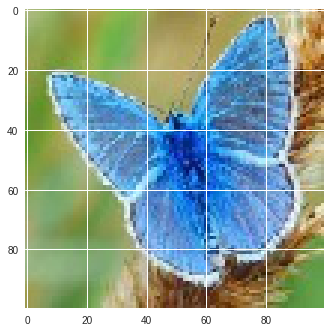

(100, 100)
10000 (100, 100)


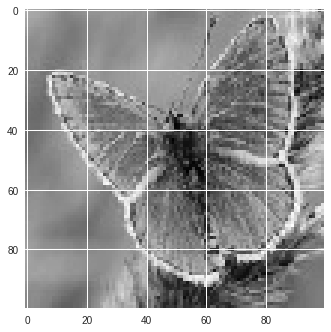

6.jpg


In [0]:
a_list =  ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg','6.jpg','7.jpg','8.jpg','9.jpg','10.jpg','11.jpg','12.jpg','13.jpg','14.jpg','15.jpg','16.jpg','17.jpg','18.jpg','19.jpg','20.jpg','21.jpg','22.jpg','23.jpg','24.jpg','25.jpg','26.jpg','27.jpg','28.jpg','29.jpg','30.jpg']
#head2 = [ float(s.split(';')[1]) for s in head ]
len(a_list)
from PIL import Image
import matplotlib.pyplot as plt
img= Image.open(a_list [5],'r')
plt.imshow(img)
plt.show()
print(img.size)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(a_list [5])     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
print(gray.size,gray.shape)

plt.show()
print(a_list [5])

In [0]:
import requests
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.image as mpimg

new_width  = 100
new_height = 100
x_train = np.empty((30,new_width ,new_height,1),dtype="float32")
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
  
for i in range(len(a_list)):
  



    img = mpimg.imread(a_list [i])     
    gray = rgb2gray(img)    
   # plt.imshow(gray, cmap = plt.get_cmap('gray'))

   # img= Image.open(a_list [i],'r')
    gray = gray.resize((new_width, new_height), Image.ANTIALIAS)

    x = img_to_array(gray)
    x = x.reshape((1, 100, 100,1))
    x_train += x
print(x_train.shape,x_train.size)

TypeError: ignored

In [0]:
import requests
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.image as mpimg

new_width  = 100
new_height = 100
x_train = np.empty((30,new_width ,new_height,1),dtype="float32")
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
  
for i in range(len(a_list)):

    img = mpimg.imread(a_list [i])     
    gray = rgb2gray(img)    
   # plt.imshow(gray, cmap = plt.get_cmap('gray'))

   # img= Image.open(a_list [i],'r')
   # gray = gray.resize((new_width, new_height), Image.ANTIALIAS)

    x = img_to_array(gray)
    x = x.reshape((1, 100, 100,1))
    x_train += x
print(x_train.shape,x_train.size)

(30, 100, 100, 1) 300000


In [0]:
# adatok betöltése

# skálázás -1 és 1 közé
x_train = x_train / 127.5 - 1
#x_train = np.expand_dims(x_train, axis = 3) # legyen channel dim is

# diszkriminátor kimenetek
valid = np.ones((batch_size, 1)) # D(x)    = 1
fake = np.zeros((batch_size, 1)) # D(G(z)) = 0

In [0]:
# generált képek kirajzolása

from IPython import display

def plot_images(gan, epoch):
  r, c = 5,5
  noise = np.random.normal(0, 1, (r * c, gan.latent_dim))
  gen_imgs = gan.generator.predict(noise)
  
  # rescale to 0-1 (from -1 -- 1)
  gen_imgs = 0.5 * gen_imgs + 0.5
  
  plt.title('epoch ' + str(epoch))
  fig, ax = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
#      ax[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      ax[i,j].imshow(gen_imgs[cnt, :, :, 0])
      ax[i,j].axis('off')
      cnt += 1
  
  display.display(plt.gcf())

[25] 30 1 10000


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 loss_D nan loss_G nan


/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:897: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


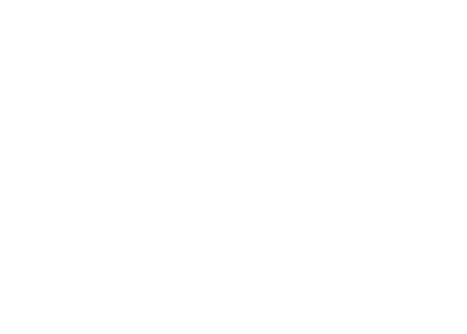

[6] 30 1 10000
[20] 30 1 10000
[29] 30 1 10000
[0] 30 1 10000
[29] 30 1 10000
[21] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[12] 30 1 10000
[1] 30 1 10000
[23] 30 1 10000
[8] 30 1 10000
[27] 30 1 10000
[18] 30 1 10000
[23] 30 1 10000
[21] 30 1 10000
[3] 30 1 10000
[18] 30 1 10000
[28] 30 1 10000
[6] 30 1 10000
[25] 30 1 10000
[12] 30 1 10000
[1] 30 1 10000
[23] 30 1 10000
[15] 30 1 10000
[0] 30 1 10000
[1] 30 1 10000
[2] 30 1 10000
[5] 30 1 10000
[13] 30 1 10000
[23] 30 1 10000
[29] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[9] 30 1 10000
[5] 30 1 10000
[14] 30 1 10000
[3] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[15] 30 1 10000
[24] 30 1 10000
[8] 30 1 10000
[11] 30 1 10000
[24] 30 1 10000
[23] 30 1 10000
[17] 30 1 10000
[25] 30 1 10000
[26] 30 1 10000
[27] 30 1 10000
[15] 30 1 10000
[14] 30 1 10000
[29] 30 1 10000
[29] 30 1 10000
[28] 30 1 10000
[3] 30 1 10000
[1] 30 1 10000
[5] 30 1 10000
[13] 30 1 10000
[23] 30 1 10000
[18] 30 1 10000
[1] 30 1 10000
[11] 30 1 1000

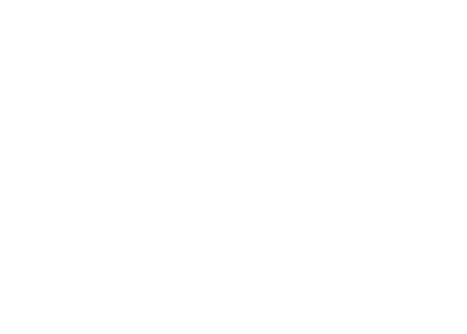

[24] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[19] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[4] 30 1 10000
[14] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[17] 30 1 10000
[4] 30 1 10000
[21] 30 1 10000
[20] 30 1 10000
[19] 30 1 10000
[4] 30 1 10000
[8] 30 1 10000
[1] 30 1 10000
[7] 30 1 10000
[13] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[12] 30 1 10000
[12] 30 1 10000
[9] 30 1 10000
[6] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[11] 30 1 10000
[10] 30 1 10000
[22] 30 1 10000
[16] 30 1 10000
[14] 30 1 10000
[26] 30 1 10000
[7] 30 1 10000
[23] 30 1 10000
[11] 30 1 10000
[14] 30 1 10000
[18] 30 1 10000
[11] 30 1 10000
[3] 30 1 10000
[23] 30 1 10000
[23] 30 1 10000
[24] 30 1 10000
[12] 30 1 10000
[10] 30 1 10000
[6] 30 1 10000
[25] 30 1 10000
[4] 30 1 10000
[0] 30 1 10000
[5] 30 1 10000
[17] 30 1 10000
[2] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[17] 30 1 10000
[19] 30 1 10000
[11] 30 1 10000
[13] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000

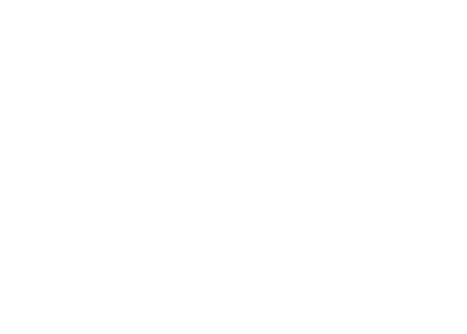

[22] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[13] 30 1 10000
[25] 30 1 10000
[28] 30 1 10000
[19] 30 1 10000
[10] 30 1 10000
[7] 30 1 10000
[10] 30 1 10000
[13] 30 1 10000
[8] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[1] 30 1 10000
[3] 30 1 10000
[13] 30 1 10000
[3] 30 1 10000
[23] 30 1 10000
[23] 30 1 10000
[14] 30 1 10000
[24] 30 1 10000
[19] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[4] 30 1 10000
[21] 30 1 10000
[25] 30 1 10000
[14] 30 1 10000
[26] 30 1 10000
[19] 30 1 10000
[16] 30 1 10000
[5] 30 1 10000
[15] 30 1 10000
[8] 30 1 10000
[13] 30 1 10000
[17] 30 1 10000
[17] 30 1 10000
[14] 30 1 10000
[24] 30 1 10000
[26] 30 1 10000
[2] 30 1 10000
[24] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[10] 30 1 10000
[23] 30 1 10000
[1] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[20] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[14] 30 1 10000
[0] 30 1 10000
[13] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[17] 30 1 10000
[0] 30 1 10000
[18] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000

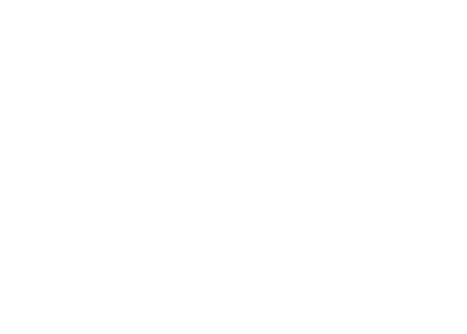

[5] 30 1 10000
[0] 30 1 10000
[14] 30 1 10000
[22] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[27] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[2] 30 1 10000
[28] 30 1 10000
[25] 30 1 10000
[27] 30 1 10000
[9] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[4] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[4] 30 1 10000
[0] 30 1 10000
[7] 30 1 10000
[7] 30 1 10000
[15] 30 1 10000
[12] 30 1 10000
[9] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[29] 30 1 10000
[25] 30 1 10000
[16] 30 1 10000
[24] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[13] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[22] 30 1 10000
[16] 30 1 10000
[1] 30 1 10000
[9] 30 1 10000
[10] 30 1 10000
[25] 30 1 10000
[28] 30 1 10000
[7] 30 1 10000
[24] 30 1 10000
[8] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[6] 30 1 10000
[4] 30 1 10000
[27] 30 1 10000
[28] 30 1 10000
[29] 30 1 10000
[15] 30 1 10000
[9] 30 1 10000
[20] 30 1 10000
[25] 30 1 10000
[5] 30 1 10000
[1] 30 1 10000
[8] 30 1 10000
[28] 30 1 10000
[8] 30 1 10000
[18

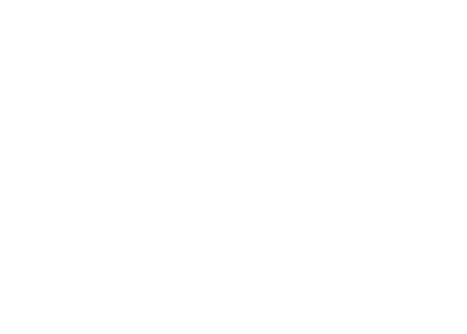

[18] 30 1 10000
[8] 30 1 10000
[29] 30 1 10000
[7] 30 1 10000
[7] 30 1 10000
[18] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000
[17] 30 1 10000
[24] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[27] 30 1 10000
[6] 30 1 10000
[28] 30 1 10000
[17] 30 1 10000
[18] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[29] 30 1 10000
[25] 30 1 10000
[21] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[16] 30 1 10000
[27] 30 1 10000
[21] 30 1 10000
[11] 30 1 10000
[18] 30 1 10000
[24] 30 1 10000
[16] 30 1 10000
[11] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[4] 30 1 10000
[28] 30 1 10000
[29] 30 1 10000
[24] 30 1 10000
[15] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[7] 30 1 10000
[11] 30 1 10000
[23] 30 1 10000
[6] 30 1 10000
[16] 30 1 10000
[6] 30 1 10000
[28] 30 1 10000
[24] 30 1 10000
[13] 30 1 10000
[11] 30 1 10000
[24] 30 1 10000
[6] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[24] 30 1 10000
[20] 30 1 10000
[1] 30 1 10000
[21] 30 1 10000
[28] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[14] 30 1 10

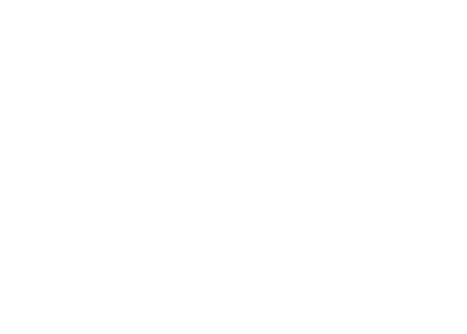

[8] 30 1 10000
[15] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[23] 30 1 10000
[5] 30 1 10000
[10] 30 1 10000
[12] 30 1 10000
[10] 30 1 10000
[18] 30 1 10000
[2] 30 1 10000
[11] 30 1 10000
[20] 30 1 10000
[20] 30 1 10000
[10] 30 1 10000
[5] 30 1 10000
[7] 30 1 10000
[14] 30 1 10000
[0] 30 1 10000
[1] 30 1 10000
[7] 30 1 10000
[25] 30 1 10000
[19] 30 1 10000
[8] 30 1 10000
[29] 30 1 10000
[11] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[27] 30 1 10000
[28] 30 1 10000
[11] 30 1 10000
[12] 30 1 10000
[22] 30 1 10000
[10] 30 1 10000
[13] 30 1 10000
[3] 30 1 10000
[26] 30 1 10000
[6] 30 1 10000
[11] 30 1 10000
[27] 30 1 10000
[5] 30 1 10000
[27] 30 1 10000
[27] 30 1 10000
[23] 30 1 10000
[16] 30 1 10000
[14] 30 1 10000
[21] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[29] 30 1 10000
[17] 30 1 10000
[3] 30 1 10000
[0] 30 1 10000
[27] 30 1 10000
[20] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[10] 30 1 10000
[8] 30 1 10000
[15] 30 1 10000
[17] 30 1 10000
[18] 30 1 10000
[14] 30 1 10000
[13] 30

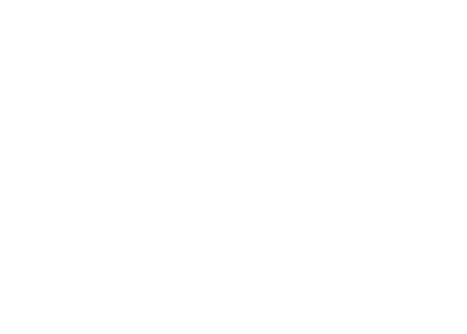

[24] 30 1 10000
[12] 30 1 10000
[20] 30 1 10000
[1] 30 1 10000
[20] 30 1 10000
[7] 30 1 10000
[21] 30 1 10000
[20] 30 1 10000
[19] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[20] 30 1 10000
[5] 30 1 10000
[20] 30 1 10000
[10] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[15] 30 1 10000
[4] 30 1 10000
[29] 30 1 10000
[23] 30 1 10000
[6] 30 1 10000
[17] 30 1 10000
[25] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[3] 30 1 10000
[11] 30 1 10000
[23] 30 1 10000
[28] 30 1 10000
[12] 30 1 10000
[10] 30 1 10000
[29] 30 1 10000
[8] 30 1 10000
[17] 30 1 10000
[21] 30 1 10000
[10] 30 1 10000
[4] 30 1 10000
[20] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[25] 30 1 10000
[13] 30 1 10000
[12] 30 1 10000
[3] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[11] 30 1 10000
[3] 30 1 10000
[5] 30 1 10000
[0] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[9] 30 1 10000
[29] 30 1 10000
[5] 30 1 10000
[4] 30 1 10000
[23] 30 1 10000
[24] 30 1 10000
[4] 30 1 10000
[13] 30 1 10000
[11] 30 1 10000

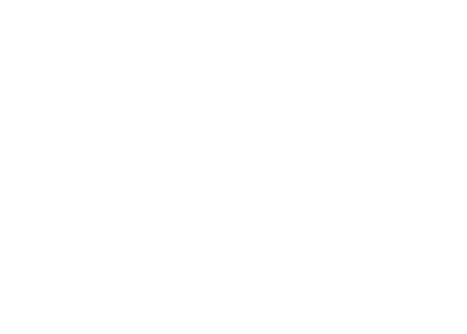

[15] 30 1 10000
[10] 30 1 10000
[14] 30 1 10000
[0] 30 1 10000
[14] 30 1 10000
[13] 30 1 10000
[23] 30 1 10000
[25] 30 1 10000
[4] 30 1 10000
[25] 30 1 10000
[29] 30 1 10000
[20] 30 1 10000
[5] 30 1 10000
[20] 30 1 10000
[19] 30 1 10000
[29] 30 1 10000
[12] 30 1 10000
[6] 30 1 10000
[6] 30 1 10000
[19] 30 1 10000
[23] 30 1 10000
[26] 30 1 10000
[6] 30 1 10000
[17] 30 1 10000
[21] 30 1 10000
[26] 30 1 10000
[1] 30 1 10000
[16] 30 1 10000
[29] 30 1 10000
[24] 30 1 10000
[27] 30 1 10000
[6] 30 1 10000
[28] 30 1 10000
[2] 30 1 10000
[9] 30 1 10000
[11] 30 1 10000
[8] 30 1 10000
[16] 30 1 10000
[26] 30 1 10000
[24] 30 1 10000
[0] 30 1 10000
[22] 30 1 10000
[3] 30 1 10000
[25] 30 1 10000
[4] 30 1 10000
[12] 30 1 10000
[23] 30 1 10000
[19] 30 1 10000
[29] 30 1 10000
[20] 30 1 10000
[4] 30 1 10000
[5] 30 1 10000
[4] 30 1 10000
[29] 30 1 10000
[9] 30 1 10000
[24] 30 1 10000
[6] 30 1 10000
[25] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[18] 30 1 10000
[16] 30 1 10000
[19] 30 1 10000
[8] 30 1 100

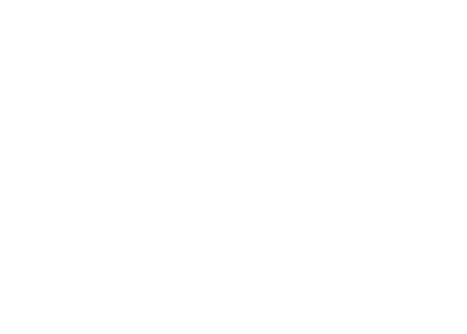

[12] 30 1 10000
[16] 30 1 10000
[19] 30 1 10000
[24] 30 1 10000
[0] 30 1 10000
[4] 30 1 10000
[5] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[1] 30 1 10000
[28] 30 1 10000
[25] 30 1 10000
[23] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[1] 30 1 10000
[24] 30 1 10000
[5] 30 1 10000
[10] 30 1 10000
[11] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[28] 30 1 10000
[20] 30 1 10000
[25] 30 1 10000
[21] 30 1 10000
[15] 30 1 10000
[11] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[17] 30 1 10000
[27] 30 1 10000
[7] 30 1 10000
[7] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[12] 30 1 10000
[8] 30 1 10000
[0] 30 1 10000
[10] 30 1 10000
[17] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[24] 30 1 10000
[23] 30 1 10000
[22] 30 1 10000
[20] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[8] 30 1 10000
[29] 30 1 10000
[9] 30 1 10000
[25] 30 1 10000
[0] 30 1 10000
[11] 30 1 10000
[18] 30 1 10000
[7] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[9] 30 1 10000
[26] 30 1 10000
[8] 30 1 10000
[22] 30 1 10000
[24] 30 1 10000


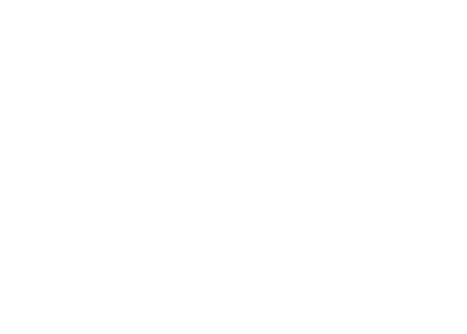

[21] 30 1 10000
[27] 30 1 10000
[19] 30 1 10000
[2] 30 1 10000
[27] 30 1 10000
[15] 30 1 10000
[11] 30 1 10000
[9] 30 1 10000
[3] 30 1 10000
[7] 30 1 10000
[25] 30 1 10000
[15] 30 1 10000
[3] 30 1 10000
[20] 30 1 10000
[11] 30 1 10000
[15] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[15] 30 1 10000
[20] 30 1 10000
[22] 30 1 10000
[17] 30 1 10000
[9] 30 1 10000
[6] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[7] 30 1 10000
[27] 30 1 10000
[10] 30 1 10000
[17] 30 1 10000
[24] 30 1 10000
[5] 30 1 10000
[8] 30 1 10000
[8] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[8] 30 1 10000
[3] 30 1 10000
[8] 30 1 10000
[18] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[20] 30 1 10000
[1] 30 1 10000
[11] 30 1 10000
[12] 30 1 10000
[11] 30 1 10000
[26] 30 1 10000
[23] 30 1 10000
[1] 30 1 10000
[2] 30 1 10000
[10] 30 1 10000
[7] 30 1 10000
[18] 30 1 10000
[9] 30 1 10000
[10] 30 1 10000
[0] 30 1 10000
[12] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[5

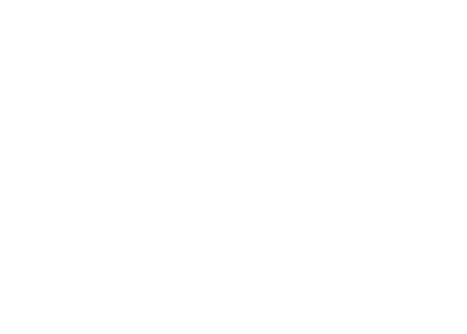

[11] 30 1 10000
[26] 30 1 10000
[10] 30 1 10000
[28] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000
[6] 30 1 10000
[22] 30 1 10000
[24] 30 1 10000
[23] 30 1 10000
[16] 30 1 10000
[25] 30 1 10000
[5] 30 1 10000
[0] 30 1 10000
[22] 30 1 10000
[8] 30 1 10000
[12] 30 1 10000
[5] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[2] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[7] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[3] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[20] 30 1 10000
[16] 30 1 10000
[13] 30 1 10000
[7] 30 1 10000
[22] 30 1 10000
[13] 30 1 10000
[5] 30 1 10000
[21] 30 1 10000
[16] 30 1 10000
[22] 30 1 10000
[20] 30 1 10000
[29] 30 1 10000
[9] 30 1 10000
[25] 30 1 10000
[20] 30 1 10000
[26] 30 1 10000
[3] 30 1 10000
[29] 30 1 10000
[18] 30 1 10000
[14] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[19] 30 1 10000
[25] 30 1 10000
[17] 30 1 10000
[22] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[0] 30 1 10000
[25] 30 1 10000
[0] 30 1 10000
[13] 30 1 10000
[25] 30 1 10000
[16] 30 1 10000
[14] 30 

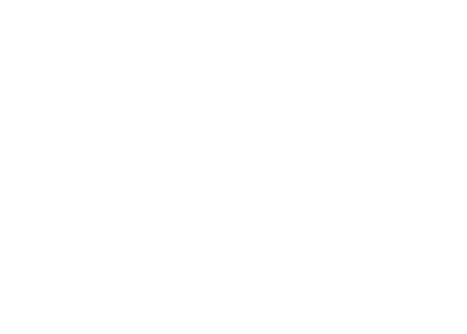

[24] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[23] 30 1 10000
[26] 30 1 10000
[1] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[20] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[17] 30 1 10000
[6] 30 1 10000
[15] 30 1 10000
[11] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[1] 30 1 10000
[0] 30 1 10000
[6] 30 1 10000
[6] 30 1 10000
[19] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[19] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[8] 30 1 10000
[17] 30 1 10000
[1] 30 1 10000
[5] 30 1 10000
[24] 30 1 10000
[4] 30 1 10000
[3] 30 1 10000
[10] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[24] 30 1 10000
[8] 30 1 10000
[18] 30 1 10000
[18] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[27] 30 1 10000
[17] 30 1 10000
[11] 30 1 10000
[19] 30 1 10000
[22] 30 1 10000
[0] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[12] 30 1 10000
[29] 30 1 10000
[15] 30 1 10000
[0] 30 1 10000
[20] 30 1 10000
[6] 30 1 1000

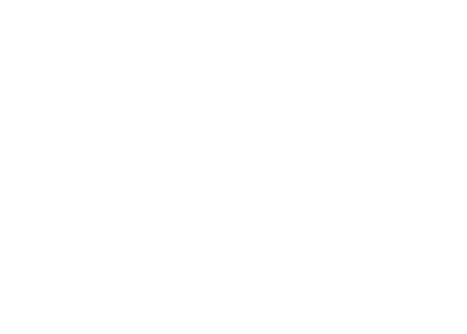

[10] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[22] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[24] 30 1 10000
[21] 30 1 10000
[25] 30 1 10000
[28] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[5] 30 1 10000
[23] 30 1 10000
[14] 30 1 10000
[2] 30 1 10000
[19] 30 1 10000
[7] 30 1 10000
[17] 30 1 10000
[0] 30 1 10000
[7] 30 1 10000
[18] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[12] 30 1 10000
[18] 30 1 10000
[24] 30 1 10000
[19] 30 1 10000
[25] 30 1 10000
[16] 30 1 10000
[29] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[6] 30 1 10000
[17] 30 1 10000
[11] 30 1 10000
[27] 30 1 10000
[26] 30 1 10000
[21] 30 1 10000
[28] 30 1 10000
[5] 30 1 10000
[11] 30 1 10000
[17] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[27] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[0] 30 1 10000
[4] 30 1 10000
[28] 30 1 10000
[15] 30 1 10000
[18] 30 1 10000
[0] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[10] 30 1 1000

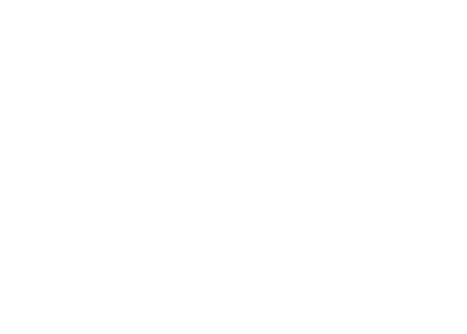

[21] 30 1 10000
[20] 30 1 10000
[15] 30 1 10000
[25] 30 1 10000
[8] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[15] 30 1 10000
[21] 30 1 10000
[27] 30 1 10000
[14] 30 1 10000
[10] 30 1 10000
[21] 30 1 10000
[26] 30 1 10000
[26] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[18] 30 1 10000
[15] 30 1 10000
[18] 30 1 10000
[0] 30 1 10000
[10] 30 1 10000
[7] 30 1 10000
[29] 30 1 10000
[8] 30 1 10000
[22] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[28] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[12] 30 1 10000
[0] 30 1 10000
[19] 30 1 10000
[15] 30 1 10000
[22] 30 1 10000
[11] 30 1 10000
[29] 30 1 10000
[24] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[24] 30 1 10000
[13] 30 1 10000
[18] 30 1 10000
[28] 30 1 10000
[6] 30 1 10000
[4] 30 1 10000
[17] 30 1 10000
[28] 30 1 10000
[11] 30 1 10000
[14] 30 1 10000
[12] 30 1 10000
[18] 30 1 10000
[7] 30 1 10000
[12] 30 1 10000
[12] 30 1 10000
[16] 30 1 10000
[11] 30 1 10000
[22] 30 1 10000
[12] 30 1 10000
[7] 30 1 10000
[16] 30 1

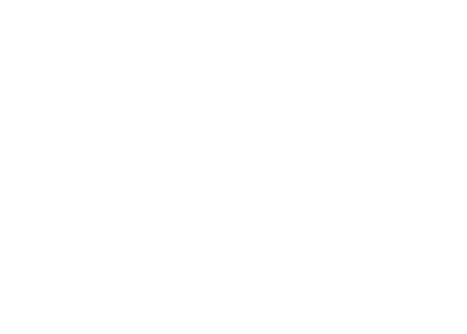

[21] 30 1 10000
[4] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[21] 30 1 10000
[15] 30 1 10000
[20] 30 1 10000
[13] 30 1 10000
[28] 30 1 10000
[21] 30 1 10000
[20] 30 1 10000
[4] 30 1 10000
[10] 30 1 10000
[5] 30 1 10000
[16] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[20] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[1] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[14] 30 1 10000
[2] 30 1 10000
[4] 30 1 10000
[7] 30 1 10000
[17] 30 1 10000
[28] 30 1 10000
[21] 30 1 10000
[27] 30 1 10000
[0] 30 1 10000
[17] 30 1 10000
[13] 30 1 10000
[13] 30 1 10000
[6] 30 1 10000
[16] 30 1 10000
[2] 30 1 10000
[12] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[14] 30 1 10000
[25] 30 1 10000
[13] 30 1 10000
[24] 30 1 10000
[21] 30 1 10000
[19] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[10] 30 1 10000
[0] 30 1 10000
[25] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[11] 30 1 10000
[8] 30 1 10000
[21] 30 1 10000
[23] 30 1 10000
[17] 30 1 10000
[29] 30 1 1000

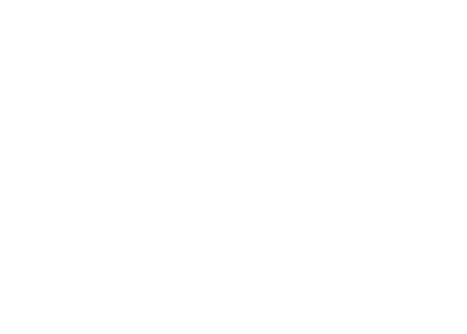

[20] 30 1 10000
[28] 30 1 10000
[14] 30 1 10000
[6] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[22] 30 1 10000
[20] 30 1 10000
[3] 30 1 10000
[14] 30 1 10000
[19] 30 1 10000
[22] 30 1 10000
[3] 30 1 10000
[23] 30 1 10000
[13] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[22] 30 1 10000
[12] 30 1 10000
[21] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[4] 30 1 10000
[27] 30 1 10000
[15] 30 1 10000
[0] 30 1 10000
[10] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[12] 30 1 10000
[23] 30 1 10000
[19] 30 1 10000
[8] 30 1 10000
[12] 30 1 10000
[24] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[25] 30 1 10000
[13] 30 1 10000
[20] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[21] 30 1 10000
[18] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[17] 30 1 10000
[17] 30 1 10000
[22] 30 1 10000
[27] 30 1 10000
[14] 30 1 10000
[8] 30 1 10000
[23] 30 1 10000
[18] 30 1 10000
[11] 30 1 10000
[6] 30 1 10000
[28] 30 1 10000
[18] 30 1 10000
[12] 30 1 10000
[2] 30 1 10000
[0] 30 1 10000
[15] 30 1 10000
[25] 30 1

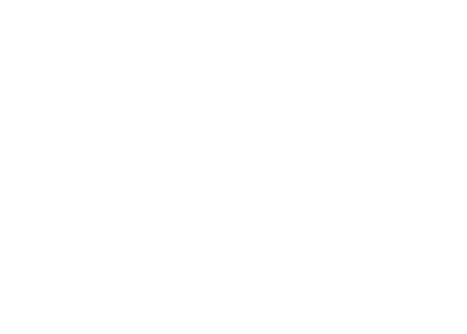

[5] 30 1 10000
[29] 30 1 10000
[18] 30 1 10000
[0] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[20] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[8] 30 1 10000
[4] 30 1 10000
[14] 30 1 10000
[28] 30 1 10000
[1] 30 1 10000
[28] 30 1 10000
[19] 30 1 10000
[15] 30 1 10000
[21] 30 1 10000
[18] 30 1 10000
[20] 30 1 10000
[1] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[17] 30 1 10000
[4] 30 1 10000
[20] 30 1 10000
[25] 30 1 10000
[24] 30 1 10000
[7] 30 1 10000
[19] 30 1 10000
[9] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[4] 30 1 10000
[6] 30 1 10000
[29] 30 1 10000
[1] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[0] 30 1 10000
[17] 30 1 10000
[2] 30 1 10000
[22] 30 1 10000
[1] 30 1 10000
[22] 30 1 10000
[19] 30 1 10000
[22] 30 1 10000
[19] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[18] 30 1 10000
[20] 30 1 10000
[14] 30 1 10000
[13] 30 1 10000
[0] 30 1 10000
[6] 30 1 10000
[12] 30 1 10000
[17] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[4] 30 1 10000
[21] 30 1 10000
[2

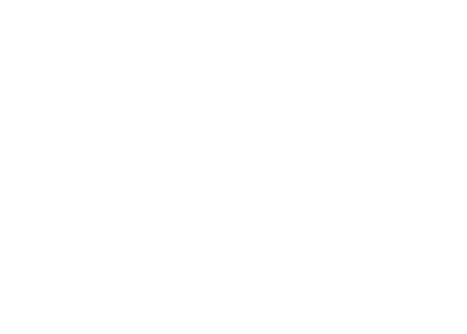

[21] 30 1 10000
[5] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[15] 30 1 10000
[15] 30 1 10000
[4] 30 1 10000
[10] 30 1 10000
[10] 30 1 10000
[14] 30 1 10000
[15] 30 1 10000
[16] 30 1 10000
[9] 30 1 10000
[15] 30 1 10000
[5] 30 1 10000
[14] 30 1 10000
[4] 30 1 10000
[16] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[24] 30 1 10000
[22] 30 1 10000
[28] 30 1 10000
[20] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[26] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[9] 30 1 10000
[3] 30 1 10000
[14] 30 1 10000
[9] 30 1 10000
[19] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[28] 30 1 10000
[18] 30 1 10000
[26] 30 1 10000
[24] 30 1 10000
[12] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[8] 30 1 10000
[12] 30 1 10000
[8] 30 1 10000
[4] 30 1 10000
[3] 30 1 10000
[0] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[13] 30 1 10000
[18] 30 1 10000
[23] 30 1 10000
[18] 30 1 10000
[26] 30 1 10000
[14] 30 1 10000
[6] 30 1 10000
[18] 30 1 10000
[22] 30 1 10000
[10] 30 1 10000


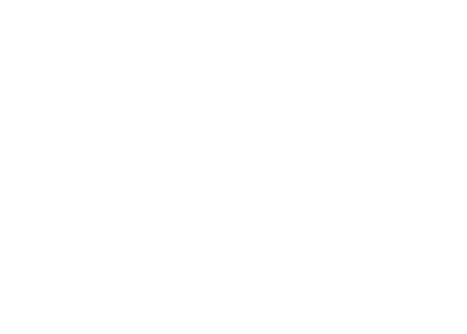

[15] 30 1 10000
[17] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[12] 30 1 10000
[19] 30 1 10000
[14] 30 1 10000
[14] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[7] 30 1 10000
[12] 30 1 10000
[10] 30 1 10000
[1] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[14] 30 1 10000
[2] 30 1 10000
[5] 30 1 10000
[22] 30 1 10000
[28] 30 1 10000
[10] 30 1 10000
[23] 30 1 10000
[6] 30 1 10000
[7] 30 1 10000
[13] 30 1 10000
[5] 30 1 10000
[10] 30 1 10000
[5] 30 1 10000
[6] 30 1 10000
[16] 30 1 10000
[12] 30 1 10000
[13] 30 1 10000
[0] 30 1 10000
[1] 30 1 10000
[16] 30 1 10000
[3] 30 1 10000
[1] 30 1 10000
[17] 30 1 10000
[6] 30 1 10000
[17] 30 1 10000
[12] 30 1 10000
[16] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[8] 30 1 10000
[19] 30 1 10000
[23] 30 1 10000
[17] 30 1 10000
[11] 30 1 10000
[19] 30 1 10000
[14] 30 1 10000
[22] 30 1 10000
[25] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[25] 30 1 10000
[25] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[10] 30 1 1000

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


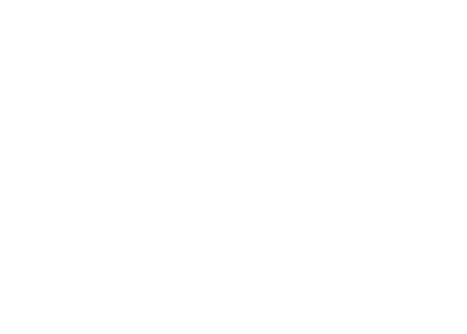

[9] 30 1 10000
[20] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[8] 30 1 10000
[0] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[26] 30 1 10000
[5] 30 1 10000
[5] 30 1 10000
[29] 30 1 10000
[25] 30 1 10000
[7] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[3] 30 1 10000
[14] 30 1 10000
[16] 30 1 10000
[19] 30 1 10000
[6] 30 1 10000
[25] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[13] 30 1 10000
[28] 30 1 10000
[9] 30 1 10000
[7] 30 1 10000
[2] 30 1 10000
[11] 30 1 10000
[24] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[12] 30 1 10000
[20] 30 1 10000
[9] 30 1 10000
[21] 30 1 10000
[19] 30 1 10000
[3] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[29] 30 1 10000
[27] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[2] 30 1 10000
[14] 30 1 10000
[16] 30 1 10000
[10] 30 1 10000
[16] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[27] 30 1 10000
[21] 30 1 10000
[23] 30 1 10000
[15] 30 1 10000
[21] 30 1 10000
[27] 30 1 10000
[21] 30 1 10000
[16] 30 1 10000

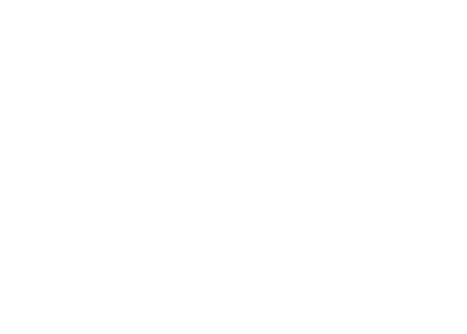

[12] 30 1 10000
[21] 30 1 10000
[13] 30 1 10000
[17] 30 1 10000
[12] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[28] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[24] 30 1 10000
[25] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[5] 30 1 10000
[12] 30 1 10000
[5] 30 1 10000
[13] 30 1 10000
[10] 30 1 10000
[7] 30 1 10000
[3] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[11] 30 1 10000
[3] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[13] 30 1 10000
[23] 30 1 10000
[24] 30 1 10000
[12] 30 1 10000
[22] 30 1 10000
[6] 30 1 10000
[8] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[23] 30 1 10000
[16] 30 1 10000
[16] 30 1 10000
[2] 30 1 10000
[5] 30 1 10000
[11] 30 1 10000
[11] 30 1 10000
[14] 30 1 10000
[5] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[2] 30 1 10000
[1] 30 1 10000
[18] 30 1 10000
[15] 30 1 10000
[5] 30 1 10000
[0] 30 1 10000
[26] 30 1 10000
[8] 30 1 10000
[22] 30 1 10000
[15] 30 1 10000
[7] 30 1 10000
[3] 30 1 10000
[19] 30 1 10000
[0] 30 1 10000
[16] 30 1 10000
[

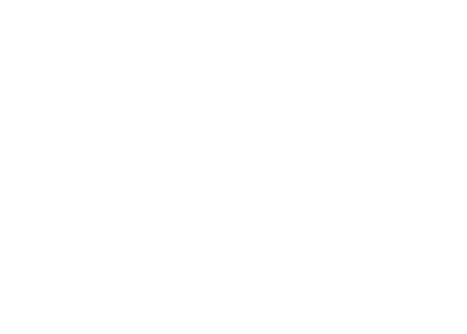

[16] 30 1 10000
[4] 30 1 10000
[27] 30 1 10000
[20] 30 1 10000
[24] 30 1 10000
[6] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[18] 30 1 10000
[11] 30 1 10000
[15] 30 1 10000
[23] 30 1 10000
[6] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[26] 30 1 10000
[23] 30 1 10000
[13] 30 1 10000
[1] 30 1 10000
[24] 30 1 10000
[29] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[14] 30 1 10000
[7] 30 1 10000
[7] 30 1 10000
[2] 30 1 10000
[3] 30 1 10000
[18] 30 1 10000
[27] 30 1 10000
[25] 30 1 10000
[29] 30 1 10000
[4] 30 1 10000
[14] 30 1 10000
[8] 30 1 10000
[19] 30 1 10000
[1] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[3] 30 1 10000
[2] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[2] 30 1 10000
[10] 30 1 10000
[4] 30 1 10000
[11] 30 1 10000
[25] 30 1 10000
[24] 30 1 10000
[20] 30 1 10000
[0] 30 1 10000
[12] 30 1 10000
[26] 30 1 10000
[29] 30 1 10000
[11] 30 1 10000
[18] 30 1 10000
[4] 30 1 10000
[19] 30 1 10000
[1] 30 1 10000
[11] 30 1 10000
[19] 30 1 10000
[28] 30 1 10000

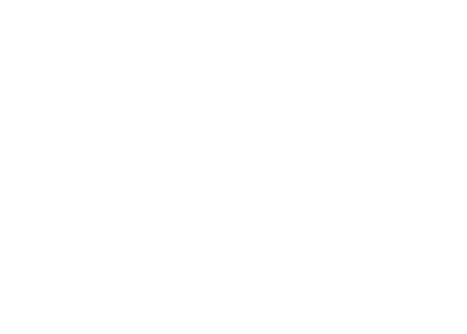

[23] 30 1 10000
[0] 30 1 10000
[2] 30 1 10000
[15] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[18] 30 1 10000
[25] 30 1 10000
[20] 30 1 10000
[17] 30 1 10000
[3] 30 1 10000
[5] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[25] 30 1 10000
[8] 30 1 10000
[4] 30 1 10000
[0] 30 1 10000
[10] 30 1 10000
[29] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[23] 30 1 10000
[27] 30 1 10000
[17] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[8] 30 1 10000
[26] 30 1 10000
[27] 30 1 10000
[24] 30 1 10000
[21] 30 1 10000
[1] 30 1 10000
[17] 30 1 10000
[11] 30 1 10000
[17] 30 1 10000
[2] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[8] 30 1 10000
[25] 30 1 10000
[5] 30 1 10000
[5] 30 1 10000
[10] 30 1 10000
[27] 30 1 10000
[18] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[16] 30 1 10000
[16] 30 1 10000
[2] 30 1 10000
[22] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[16] 30 1 10000
[14] 30 1 10000
[27] 30 1 10000
[1] 30 1 10000
[4] 30 1 10000
[24] 30 1 10000
[3] 30 1 10000
[25] 30 1 10000
[29] 30 1 10000
[

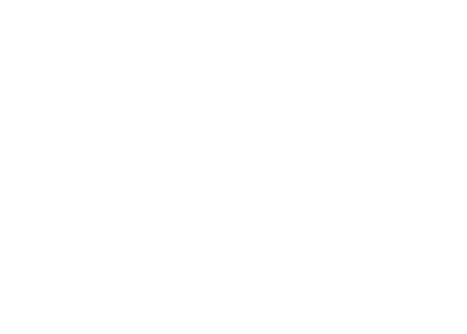

[26] 30 1 10000
[23] 30 1 10000
[15] 30 1 10000
[26] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[28] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[24] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[6] 30 1 10000
[24] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[28] 30 1 10000
[4] 30 1 10000
[16] 30 1 10000
[3] 30 1 10000
[26] 30 1 10000
[3] 30 1 10000
[23] 30 1 10000
[4] 30 1 10000
[18] 30 1 10000
[10] 30 1 10000
[6] 30 1 10000
[3] 30 1 10000
[25] 30 1 10000
[11] 30 1 10000
[18] 30 1 10000
[13] 30 1 10000
[20] 30 1 10000
[24] 30 1 10000
[19] 30 1 10000
[10] 30 1 10000
[19] 30 1 10000
[24] 30 1 10000
[13] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[19] 30 1 10000
[25] 30 1 10000
[14] 30 1 10000
[26] 30 1 10000
[24] 30 1 10000
[2] 30 1 10000
[20] 30 1 10000
[15] 30 1 10000
[15] 30 1 10000
[27] 30 1 10000
[14] 30 1 10000
[14] 30 1 10000
[0] 30 1 10000
[12] 30 1 10000
[23] 30 1 10000
[0] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[17] 30 1 

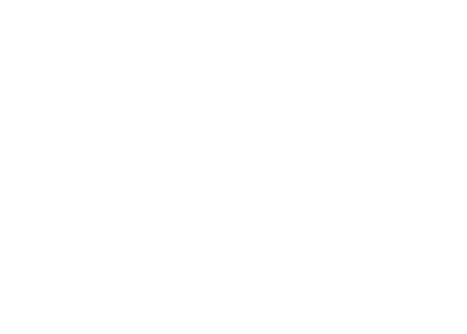

[29] 30 1 10000
[3] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[5] 30 1 10000
[25] 30 1 10000
[19] 30 1 10000
[4] 30 1 10000
[8] 30 1 10000
[18] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[20] 30 1 10000
[17] 30 1 10000
[4] 30 1 10000
[13] 30 1 10000
[9] 30 1 10000
[8] 30 1 10000
[21] 30 1 10000
[29] 30 1 10000
[6] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[7] 30 1 10000
[13] 30 1 10000
[0] 30 1 10000
[0] 30 1 10000
[17] 30 1 10000
[21] 30 1 10000
[14] 30 1 10000
[29] 30 1 10000
[4] 30 1 10000
[13] 30 1 10000
[8] 30 1 10000
[25] 30 1 10000
[11] 30 1 10000
[8] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[23] 30 1 10000
[19] 30 1 10000
[27] 30 1 10000
[20] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[11] 30 1 10000
[9] 30 1 10000
[18] 30 1 10000
[18] 30 1 10000
[9] 30 1 10000
[3] 30 1 10000
[28] 30 1 10000
[21] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[23] 30 1 10000
[28] 30 1 10000
[13] 30 1 10000
[29] 30 1 10000
[5] 30 1 10000
[2] 30 1 10000
[0] 30 1 10000
[17] 30 1 10000
[17] 30 1 10000

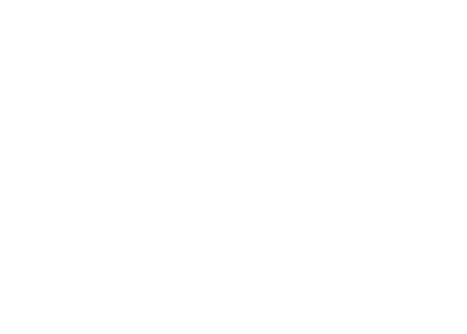

[6] 30 1 10000
[28] 30 1 10000
[2] 30 1 10000
[15] 30 1 10000
[28] 30 1 10000
[19] 30 1 10000
[22] 30 1 10000
[14] 30 1 10000
[11] 30 1 10000
[15] 30 1 10000
[20] 30 1 10000
[14] 30 1 10000
[11] 30 1 10000
[24] 30 1 10000
[22] 30 1 10000
[18] 30 1 10000
[27] 30 1 10000
[18] 30 1 10000
[3] 30 1 10000
[26] 30 1 10000
[24] 30 1 10000
[15] 30 1 10000
[24] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[27] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000
[1] 30 1 10000
[20] 30 1 10000
[15] 30 1 10000
[10] 30 1 10000
[23] 30 1 10000
[18] 30 1 10000
[29] 30 1 10000
[28] 30 1 10000
[5] 30 1 10000
[16] 30 1 10000
[17] 30 1 10000
[28] 30 1 10000
[11] 30 1 10000
[15] 30 1 10000
[24] 30 1 10000
[21] 30 1 10000
[5] 30 1 10000
[13] 30 1 10000
[14] 30 1 10000
[17] 30 1 10000
[26] 30 1 10000
[0] 30 1 10000
[19] 30 1 10000
[20] 30 1 10000
[24] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[18] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[5] 30 1 10000
[27] 30 1 10000
[8] 30 1 10000
[20] 30 1 10000
[24] 30 1 10000
[18] 

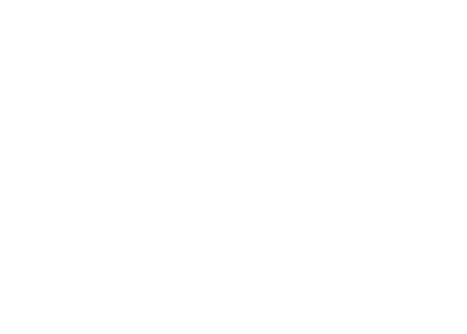

[25] 30 1 10000
[10] 30 1 10000
[12] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[2] 30 1 10000
[26] 30 1 10000
[26] 30 1 10000
[1] 30 1 10000
[6] 30 1 10000
[22] 30 1 10000
[10] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[24] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[2] 30 1 10000
[12] 30 1 10000
[29] 30 1 10000
[18] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[22] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[18] 30 1 10000
[12] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[29] 30 1 10000
[29] 30 1 10000
[0] 30 1 10000
[19] 30 1 10000
[14] 30 1 10000
[8] 30 1 10000
[6] 30 1 10000
[21] 30 1 10000
[5] 30 1 10000
[29] 30 1 10000
[23] 30 1 10000
[15] 30 1 10000
[16] 30 1 10000
[6] 30 1 10000
[9] 30 1 10000
[27] 30 1 10000
[12] 30 1 10000
[27] 30 1 10000
[6] 30 1 10000
[15] 30 1 10000
[6] 30 1 10000
[8] 30 1 10000
[22] 30 1 10000
[20] 30 1 10000
[23] 30 1 10000
[24] 30 1 10000
[29] 30 1 10000
[18] 30 1 10000
[23] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[2] 30 1 10000

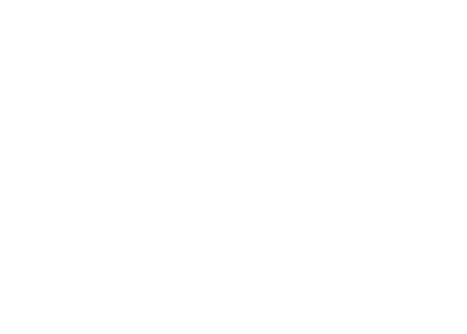

[25] 30 1 10000
[19] 30 1 10000
[14] 30 1 10000
[14] 30 1 10000
[12] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[22] 30 1 10000
[21] 30 1 10000
[23] 30 1 10000
[18] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[6] 30 1 10000
[3] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[16] 30 1 10000
[13] 30 1 10000
[9] 30 1 10000
[7] 30 1 10000
[24] 30 1 10000
[5] 30 1 10000
[5] 30 1 10000
[16] 30 1 10000
[2] 30 1 10000
[21] 30 1 10000
[14] 30 1 10000
[23] 30 1 10000
[5] 30 1 10000
[3] 30 1 10000
[4] 30 1 10000
[19] 30 1 10000
[16] 30 1 10000
[6] 30 1 10000
[1] 30 1 10000
[10] 30 1 10000
[19] 30 1 10000
[24] 30 1 10000
[18] 30 1 10000
[2] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[11] 30 1 10000
[15] 30 1 10000
[27] 30 1 10000
[1] 30 1 10000
[13] 30 1 10000
[2] 30 1 10000
[18] 30 1 10000
[23] 30 1 10000
[8] 30 1 10000
[9] 30 1 10000
[21] 30 1 10000
[24] 30 1 10000
[28] 30 1 10000
[11] 30 1 10000
[4] 30 1 10000
[14] 30 1 10000
[19] 30 1 10000
[27] 30 1 10000
[24] 30 1 10000
[27] 30 1 10000
[28] 30 1 10000


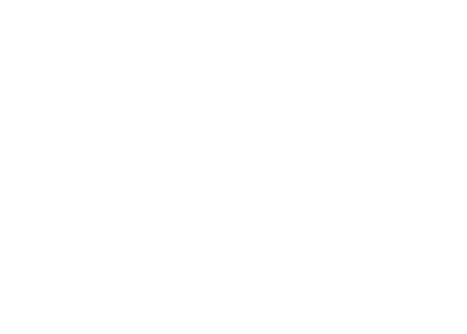

[8] 30 1 10000
[20] 30 1 10000
[0] 30 1 10000
[1] 30 1 10000
[28] 30 1 10000
[8] 30 1 10000
[13] 30 1 10000
[27] 30 1 10000
[15] 30 1 10000
[20] 30 1 10000
[28] 30 1 10000
[20] 30 1 10000
[20] 30 1 10000
[11] 30 1 10000
[0] 30 1 10000
[6] 30 1 10000
[13] 30 1 10000
[14] 30 1 10000
[22] 30 1 10000
[24] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[12] 30 1 10000
[18] 30 1 10000
[13] 30 1 10000
[9] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[1] 30 1 10000
[1] 30 1 10000
[15] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[25] 30 1 10000
[8] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[3] 30 1 10000
[20] 30 1 10000
[1] 30 1 10000
[15] 30 1 10000
[26] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[2] 30 1 10000
[23] 30 1 10000
[21] 30 1 10000
[10] 30 1 10000
[2] 30 1 10000
[18] 30 1 10000
[15] 30 1 10000
[11] 30 1 10000
[4] 30 1 10000
[22] 30 1 10000
[2] 30 1 10000
[21] 30 1 10000
[24] 30 1 10000
[2] 30 1 10000
[5] 30 1 10000
[21] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[18] 30 1 10000
[8] 30 1 10000
[

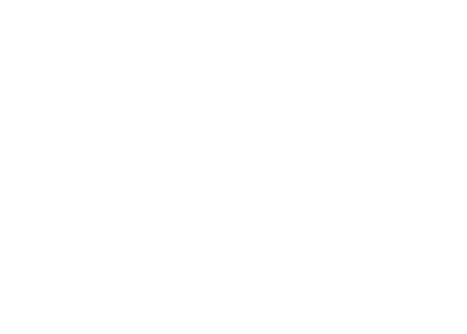

[14] 30 1 10000
[9] 30 1 10000
[2] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[4] 30 1 10000
[18] 30 1 10000
[3] 30 1 10000
[24] 30 1 10000
[18] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[28] 30 1 10000
[16] 30 1 10000
[27] 30 1 10000
[11] 30 1 10000
[10] 30 1 10000
[10] 30 1 10000
[15] 30 1 10000
[10] 30 1 10000
[14] 30 1 10000
[0] 30 1 10000
[21] 30 1 10000
[15] 30 1 10000
[22] 30 1 10000
[4] 30 1 10000
[21] 30 1 10000
[18] 30 1 10000
[18] 30 1 10000
[23] 30 1 10000
[19] 30 1 10000
[22] 30 1 10000
[8] 30 1 10000
[10] 30 1 10000
[6] 30 1 10000
[19] 30 1 10000
[20] 30 1 10000
[10] 30 1 10000
[22] 30 1 10000
[1] 30 1 10000
[20] 30 1 10000
[16] 30 1 10000
[10] 30 1 10000
[29] 30 1 10000
[12] 30 1 10000
[11] 30 1 10000
[14] 30 1 10000
[10] 30 1 10000
[18] 30 1 10000
[5] 30 1 10000
[1] 30 1 10000
[19] 30 1 10000
[4] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[26] 30 1 10000
[15] 30 1 10000
[4] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[19] 30 1 10000
[1] 30 1 10000
[6] 30 1 10000
[13] 30 1

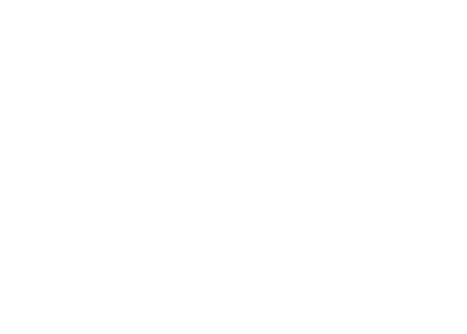

[2] 30 1 10000
[15] 30 1 10000
[13] 30 1 10000
[13] 30 1 10000
[23] 30 1 10000
[12] 30 1 10000
[29] 30 1 10000
[11] 30 1 10000
[1] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[24] 30 1 10000
[11] 30 1 10000
[23] 30 1 10000
[27] 30 1 10000
[24] 30 1 10000
[3] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[18] 30 1 10000
[28] 30 1 10000
[23] 30 1 10000
[0] 30 1 10000
[25] 30 1 10000
[9] 30 1 10000
[10] 30 1 10000
[20] 30 1 10000
[21] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[0] 30 1 10000
[19] 30 1 10000
[5] 30 1 10000
[19] 30 1 10000
[4] 30 1 10000
[15] 30 1 10000
[28] 30 1 10000
[5] 30 1 10000
[27] 30 1 10000
[27] 30 1 10000
[12] 30 1 10000
[7] 30 1 10000
[16] 30 1 10000
[20] 30 1 10000
[8] 30 1 10000
[8] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[8] 30 1 10000
[4] 30 1 10000
[26] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000
[3] 30 1 10000
[26] 30 1 10000
[0] 30 1 10000
[22] 30 1 10000
[29] 30 1 10000
[13] 30 1 1000

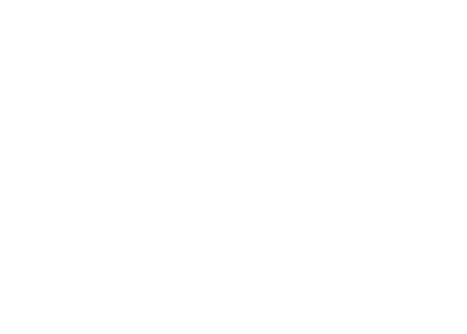

[0] 30 1 10000
[28] 30 1 10000
[12] 30 1 10000
[1] 30 1 10000
[9] 30 1 10000
[1] 30 1 10000
[19] 30 1 10000
[0] 30 1 10000
[11] 30 1 10000
[24] 30 1 10000
[25] 30 1 10000
[11] 30 1 10000
[21] 30 1 10000
[14] 30 1 10000
[14] 30 1 10000
[26] 30 1 10000
[27] 30 1 10000
[0] 30 1 10000
[10] 30 1 10000
[12] 30 1 10000
[15] 30 1 10000
[0] 30 1 10000
[15] 30 1 10000
[12] 30 1 10000
[24] 30 1 10000
[2] 30 1 10000
[13] 30 1 10000
[21] 30 1 10000
[21] 30 1 10000
[16] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[21] 30 1 10000
[0] 30 1 10000
[14] 30 1 10000
[19] 30 1 10000
[28] 30 1 10000
[7] 30 1 10000
[22] 30 1 10000
[14] 30 1 10000
[23] 30 1 10000
[9] 30 1 10000
[24] 30 1 10000
[4] 30 1 10000
[7] 30 1 10000
[18] 30 1 10000
[28] 30 1 10000
[19] 30 1 10000
[29] 30 1 10000
[8] 30 1 10000
[17] 30 1 10000
[25] 30 1 10000
[20] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[12] 30 1 10000
[3] 30 1 10000
[18] 30 1 10000
[22] 30 1 10000
[4] 30 1 10000
[16] 30 1 10000
[3] 30 1 10000
[17] 30 1 1000

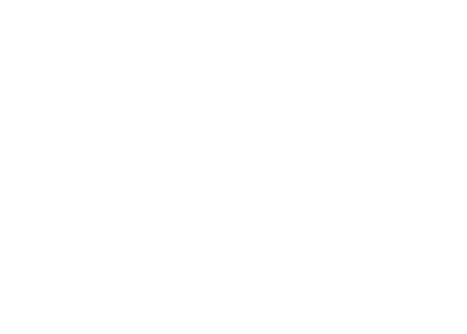

[28] 30 1 10000
[19] 30 1 10000
[1] 30 1 10000
[8] 30 1 10000
[16] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[10] 30 1 10000
[6] 30 1 10000
[27] 30 1 10000
[25] 30 1 10000
[0] 30 1 10000
[11] 30 1 10000
[5] 30 1 10000
[9] 30 1 10000
[11] 30 1 10000
[7] 30 1 10000
[26] 30 1 10000
[11] 30 1 10000
[5] 30 1 10000
[12] 30 1 10000
[21] 30 1 10000
[28] 30 1 10000
[13] 30 1 10000
[3] 30 1 10000
[13] 30 1 10000
[7] 30 1 10000
[27] 30 1 10000
[1] 30 1 10000
[16] 30 1 10000
[19] 30 1 10000
[24] 30 1 10000
[18] 30 1 10000
[26] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[2] 30 1 10000
[8] 30 1 10000
[7] 30 1 10000
[4] 30 1 10000
[25] 30 1 10000
[13] 30 1 10000
[9] 30 1 10000
[14] 30 1 10000
[28] 30 1 10000
[0] 30 1 10000
[7] 30 1 10000
[1] 30 1 10000
[15] 30 1 10000
[29] 30 1 10000
[28] 30 1 10000
[2] 30 1 10000
[13] 30 1 10000
[22] 30 1 10000
[25] 30 1 10000
[28] 30 1 10000
[3] 30 1 10000
[14] 30 1 10000
[6] 30 1 10000
[28] 30 1 10000
[27] 30 1 10000
[2] 30 1 10000
[22] 30 1 10000
[

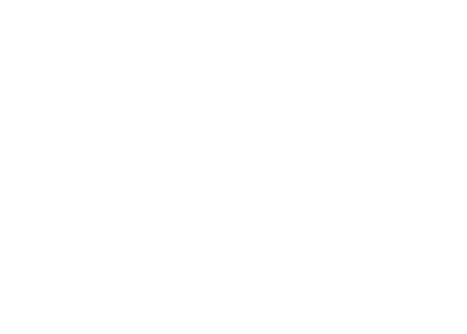

[7] 30 1 10000
[18] 30 1 10000
[24] 30 1 10000
[9] 30 1 10000
[15] 30 1 10000
[9] 30 1 10000
[13] 30 1 10000
[25] 30 1 10000
[0] 30 1 10000
[11] 30 1 10000
[16] 30 1 10000
[24] 30 1 10000
[9] 30 1 10000
[26] 30 1 10000
[19] 30 1 10000
[10] 30 1 10000
[25] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[14] 30 1 10000
[18] 30 1 10000
[19] 30 1 10000
[21] 30 1 10000
[17] 30 1 10000
[5] 30 1 10000
[21] 30 1 10000
[10] 30 1 10000
[27] 30 1 10000
[24] 30 1 10000
[2] 30 1 10000
[4] 30 1 10000
[4] 30 1 10000
[7] 30 1 10000
[29] 30 1 10000
[15] 30 1 10000
[10] 30 1 10000
[12] 30 1 10000
[4] 30 1 10000
[17] 30 1 10000
[23] 30 1 10000
[10] 30 1 10000
[29] 30 1 10000
[10] 30 1 10000
[21] 30 1 10000
[16] 30 1 10000
[7] 30 1 10000
[17] 30 1 10000
[17] 30 1 10000
[9] 30 1 10000
[4] 30 1 10000
[26] 30 1 10000
[26] 30 1 10000
[3] 30 1 10000
[4] 30 1 10000
[22] 30 1 10000
[6] 30 1 10000
[18] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[26] 30 1 10000
[28] 30 1 10000
[12] 30 1 10000
[13] 30 1 10000
[29] 30 1 

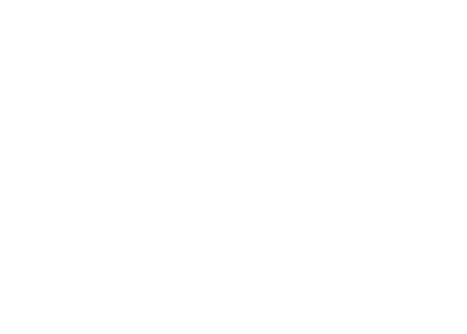

[28] 30 1 10000
[21] 30 1 10000
[5] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[18] 30 1 10000
[5] 30 1 10000
[13] 30 1 10000
[10] 30 1 10000
[5] 30 1 10000
[20] 30 1 10000
[10] 30 1 10000
[5] 30 1 10000
[22] 30 1 10000
[28] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[20] 30 1 10000
[28] 30 1 10000
[29] 30 1 10000
[15] 30 1 10000
[28] 30 1 10000
[9] 30 1 10000
[23] 30 1 10000
[7] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[22] 30 1 10000
[26] 30 1 10000
[12] 30 1 10000
[28] 30 1 10000
[22] 30 1 10000
[13] 30 1 10000
[26] 30 1 10000
[22] 30 1 10000
[18] 30 1 10000
[24] 30 1 10000
[14] 30 1 10000
[9] 30 1 10000
[11] 30 1 10000
[28] 30 1 10000
[6] 30 1 10000
[8] 30 1 10000
[15] 30 1 10000
[13] 30 1 10000
[25] 30 1 10000
[2] 30 1 10000
[7] 30 1 10000
[9] 30 1 10000
[1] 30 1 10000
[5] 30 1 10000
[20] 30 1 10000
[6] 30 1 10000
[0] 30 1 10000
[7] 30 1 10000
[28] 30 1 10000
[9] 30 1 10000
[26] 30 1 10000
[4] 30 1 10000
[10] 30 1 10000
[2] 30 1 10000
[3] 30 1 10000

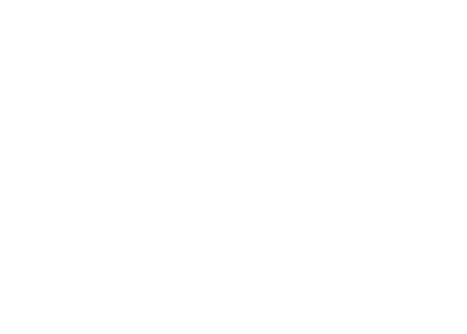

[26] 30 1 10000
[13] 30 1 10000
[2] 30 1 10000
[18] 30 1 10000
[5] 30 1 10000
[17] 30 1 10000
[12] 30 1 10000
[12] 30 1 10000
[21] 30 1 10000
[4] 30 1 10000
[1] 30 1 10000
[9] 30 1 10000
[3] 30 1 10000
[19] 30 1 10000
[15] 30 1 10000
[10] 30 1 10000
[10] 30 1 10000
[0] 30 1 10000
[12] 30 1 10000
[22] 30 1 10000
[9] 30 1 10000
[10] 30 1 10000
[15] 30 1 10000
[26] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[5] 30 1 10000
[2] 30 1 10000
[29] 30 1 10000
[14] 30 1 10000
[3] 30 1 10000
[23] 30 1 10000
[29] 30 1 10000
[16] 30 1 10000
[10] 30 1 10000
[15] 30 1 10000
[8] 30 1 10000
[29] 30 1 10000
[25] 30 1 10000
[28] 30 1 10000
[3] 30 1 10000
[9] 30 1 10000
[23] 30 1 10000
[19] 30 1 10000
[11] 30 1 10000
[6] 30 1 10000
[14] 30 1 10000
[18] 30 1 10000
[15] 30 1 10000
[15] 30 1 10000
[12] 30 1 10000
[3] 30 1 10000
[19] 30 1 10000
[8] 30 1 10000
[29] 30 1 10000
[24] 30 1 10000
[23] 30 1 10000
[5] 30 1 10000
[19] 30 1 10000
[7] 30 1 10000
[5] 30 1 10000
[12] 30 1 10000
[7] 30 1 10000
[6] 30 1 10000


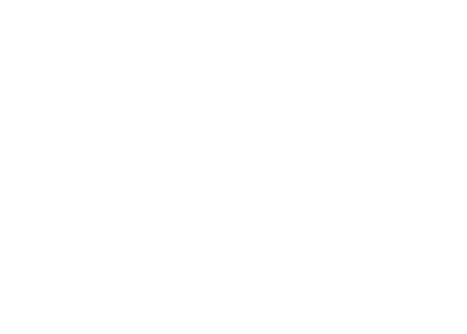

[9] 30 1 10000
[19] 30 1 10000
[11] 30 1 10000
[20] 30 1 10000
[12] 30 1 10000
[21] 30 1 10000
[8] 30 1 10000
[3] 30 1 10000
[8] 30 1 10000
[14] 30 1 10000
[25] 30 1 10000
[27] 30 1 10000
[24] 30 1 10000
[14] 30 1 10000
[3] 30 1 10000
[8] 30 1 10000
[5] 30 1 10000
[6] 30 1 10000
[15] 30 1 10000
[7] 30 1 10000
[0] 30 1 10000
[9] 30 1 10000
[6] 30 1 10000
[13] 30 1 10000
[22] 30 1 10000
[16] 30 1 10000
[21] 30 1 10000
[9] 30 1 10000
[28] 30 1 10000
[11] 30 1 10000
[19] 30 1 10000
[25] 30 1 10000
[24] 30 1 10000
[28] 30 1 10000
[26] 30 1 10000
[7] 30 1 10000
[1] 30 1 10000
[12] 30 1 10000
[1] 30 1 10000
[21] 30 1 10000
[11] 30 1 10000
[11] 30 1 10000
[21] 30 1 10000
[6] 30 1 10000
[16] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[20] 30 1 10000
[27] 30 1 10000
[19] 30 1 10000
[12] 30 1 10000
[9] 30 1 10000
[1] 30 1 10000
[26] 30 1 10000
[8] 30 1 10000
[6] 30 1 10000
[22] 30 1 10000
[16] 30 1 10000
[28] 30 1 10000
[19] 30 1 10000
[9] 30 1 10000
[6] 30 1 10000
[3] 30 1 10000
[25] 30 1 10000
[

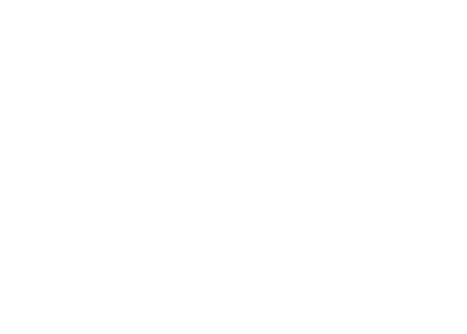

[1] 30 1 10000
[2] 30 1 10000
[14] 30 1 10000
[16] 30 1 10000
[22] 30 1 10000
[6] 30 1 10000
[6] 30 1 10000
[5] 30 1 10000
[6] 30 1 10000
[25] 30 1 10000
[22] 30 1 10000
[23] 30 1 10000
[9] 30 1 10000
[27] 30 1 10000
[11] 30 1 10000
[21] 30 1 10000
[13] 30 1 10000
[0] 30 1 10000
[16] 30 1 10000
[27] 30 1 10000
[1] 30 1 10000
[25] 30 1 10000
[3] 30 1 10000
[16] 30 1 10000
[12] 30 1 10000
[16] 30 1 10000
[14] 30 1 10000
[14] 30 1 10000
[1] 30 1 10000
[4] 30 1 10000
[8] 30 1 10000
[20] 30 1 10000
[4] 30 1 10000
[7] 30 1 10000
[12] 30 1 10000
[27] 30 1 10000
[20] 30 1 10000
[18] 30 1 10000
[2] 30 1 10000
[13] 30 1 10000
[12] 30 1 10000
[27] 30 1 10000
[16] 30 1 10000
[25] 30 1 10000
[14] 30 1 10000
[5] 30 1 10000
[21] 30 1 10000
[25] 30 1 10000
[24] 30 1 10000
[3] 30 1 10000
[15] 30 1 10000
[6] 30 1 10000
[10] 30 1 10000
[2] 30 1 10000
[2] 30 1 10000
[29] 30 1 10000
[8] 30 1 10000
[3] 30 1 10000
[4] 30 1 10000
[2] 30 1 10000
[19] 30 1 10000
[20] 30 1 10000
[28] 30 1 10000
[27] 30 1 10000
[

In [0]:
# G és D tanítása, kirajzolással
import matplotlib.pyplot as plt
import sys
import numpy as np
for epoch in range(5000):
    
  # képekből véletlen batch-nyi kiválasztása
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]
  print(idx,x_train.shape[0], batch_size, imgs.size)
  
  # egy batch-nyi kép generálás
  noise = np.random.normal(0, 1, (batch_size, gan.latent_dim))
  gen_imgs = gan.generator.predict(noise)

  # diszkriminátor tanítása
  d_loss_real = gan.discriminator.train_on_batch(imgs, valid)
  d_loss_fake = gan.discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  
  # generátor tanítása
  g_loss = gan.combined.train_on_batch(noise, valid)

  # log
  if epoch % 100 == 0:
    print(epoch, 'loss_D', d_loss[0], 'loss_G', g_loss)
 
  # generált képek kirajzolása
  if epoch % 100 == 0:
    plot_images(gan, epoch)